In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Tweeter API Credentials

In [3]:
consumerKey='BJEzhn7gh1JGE7X0dqsfuXkik'
consumerSecret='MDCgoEiQ5IgL60ixSck7FfuUciHQJUM88cGD5R3RrxjbTUiv1I'
accessToken='855235781996171265-RvlazlBae0cQDv2xyxg8QY5ZvWRHIJC'
accessTokenSecret='hthqINjILg7ReWIcHI8XxHNFgSRvW18PgSbhiCwckYf6l'

# create authentication object

In [4]:
auth = tweepy.OAuth1UserHandler(
    consumer_key=consumerKey,
    consumer_secret=consumerSecret,
    access_token=accessToken,
    access_token_secret=accessTokenSecret
)


# assign access token and access token secret to authenticate object

In [5]:
authenticate.set_access_token(accessToken, accessTokenSecret)

# API object is created by using authentication information

In [6]:
api = tweepy.API(auth, wait_on_rate_limit=True)

# extract tweets from twitter

In [16]:
def user_lookup(username):
    try:
        user = api.get_user(screen_name=username)
        print("Username:", user.screen_name)
        print("Name:", user.name)
        print("Description:", user.description)
    except Exception as e:
        print("Error:", str(e))

In [17]:
if __name__ == "__main__":
    username_to_lookup = "@minishapatel3"  # Replace with the username you want to look up
    user_lookup(username_to_lookup)


Error: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product


# Pulling data from tweeter

In [12]:
import snscrape.modules.twitter as sntwitter

In [16]:
tweetscrapper=sntwitter.TwitterSearchScraper('#python')

In [ ]:
for singletweet in tweetscrapper.get_items():
    break

In [32]:
tweet_data = {
    'Tweets': [
        "Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4",
        "What Happened To Apple Inc?   http://t.co/FJEXI3oP0U  #aapl #apple @MoneyPress http://t.co/wXKmmTMArW",
        "Thank u @apple I can now compile all of the pics that i communicate with in one place http://t.co/tq1lo09oyA",
        "@apple can i exchange my iphone for a different color lmao  i changed my mind"
    ]
}

In [33]:
df_tweets = pd.DataFrame(tweet_data)

In [34]:
print(df_tweets)

                                              Tweets
0  Wow. Yall needa step it up @Apple RT @heynyla:...
1  What Happened To Apple Inc?   http://t.co/FJEX...
2  Thank u @apple I can now compile all of the pi...
3  @apple can i exchange my iphone for a differen...


# Clear Text of Tweets

In [35]:
def ClearText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+','',txt) #remove @ from text
    txt = re.sub(r'#','',txt) #remove hash tag
    txt = re.sub(r'RT[\s]+','',txt) # remove RT
    txt = re.sub(r'https?\/\/S+','',txt) #remove the hyper link
    return txt

In [36]:
df_tweets['Tweets']=df_tweets['Tweets'].apply(ClearText)

In [37]:
df_tweets

,Tweets
0,Wow. Yall needa step it up : Music and snapch...
1,What Happened To Apple Inc? http://t.co/FJEX...
2,Thank u I can now compile all of the pics tha...
3,can i exchange my iphone for a different colo...


# create a function to get the subjectivity

In [38]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity

In [39]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create new columans of subjectivity and polarity

In [40]:
df_tweets['subjectivity']=df_tweets['Tweets'].apply(getSubjectivity)
df_tweets['polarity']=df_tweets['Tweets'].apply(getPolarity)

In [41]:
df_tweets

,Tweets,subjectivity,polarity
0,Wow. Yall needa step it up : Music and snapch...,0.5625,0.05
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0000,0.00
2,Thank u I can now compile all of the pics tha...,0.0000,0.00
3,can i exchange my iphone for a different colo...,0.8000,0.30


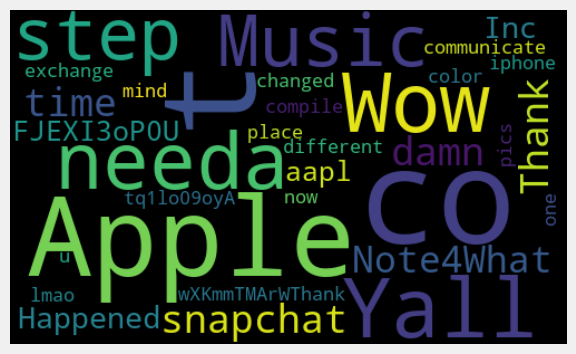

In [48]:
AllWords="".join([tweet for tweet in df_tweets['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=22,max_font_size=119).generate(AllWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# find negative, neutral and positive analysis

In [49]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else:
        return 'Positive'


In [52]:
df_tweets['analysis']=df_tweets['polarity'].apply(getAnalysis)

In [53]:
df_tweets

,Tweets,subjectivity,polarity,analysis
0,Wow. Yall needa step it up : Music and snapch...,0.5625,0.05,Positive
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0000,0.00,Neutral
2,Thank u I can now compile all of the pics tha...,0.0000,0.00,Neutral
3,can i exchange my iphone for a different colo...,0.8000,0.30,Positive
